In [11]:
import numpy as np 
import missingno as msno
import sklearn.preprocessing as preprocessing
import seaborn as sns
import pandas as pd

# LECTURE DES DONNEES

In [12]:
df = pd.read_csv(r"C:\Users\yanni\Documents\Cours_ICAM\IA_proj\Dataset_diabete_kaggle\diabetes_prediction_dataset.csv", sep=",")
#df = pd.read_csv(path+"diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [13]:
print(df.head(5)) 
print(df.dtypes)

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype:

In [14]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# Autre version pour afficher les types et nombres de valeurs uniques

In [15]:
d = []
u = []
t = []
for col in df:
    d.append(col)
    u.append(df[col].nunique())
    t.append(df[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,gender,object,3
1,age,float64,102
2,hypertension,int64,2
3,heart_disease,int64,2
4,smoking_history,object,6
5,bmi,float64,4247
6,HbA1c_level,float64,18
7,blood_glucose_level,int64,18
8,diabetes,int64,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:
df.describe().T # le .T permettant de mettre les variables en ligne
#permettant d'observer l'étendue des valeurs et #leur standard deviation

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [18]:
#Modalités des variables qualitatives et comptage
print(pd.unique(df["smoking_history"]))
print(df["smoking_history"].value_counts())

print(pd.unique(df["gender"]))
print(df["gender"].value_counts())

print(pd.unique(df["heart_disease"]))
print(df["heart_disease"].value_counts())

print(pd.unique(df["hypertension"]))
print(df["hypertension"].value_counts())

['never' 'No Info' 'current' 'former' 'ever' 'not current']
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
['Female' 'Male' 'Other']
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
[1 0]
heart_disease
0    96058
1     3942
Name: count, dtype: int64
[0 1]
hypertension
0    92515
1     7485
Name: count, dtype: int64


In [19]:
#Comptage TARGET
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

# DONNEES MANQUANTES/ REDONDANTES

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

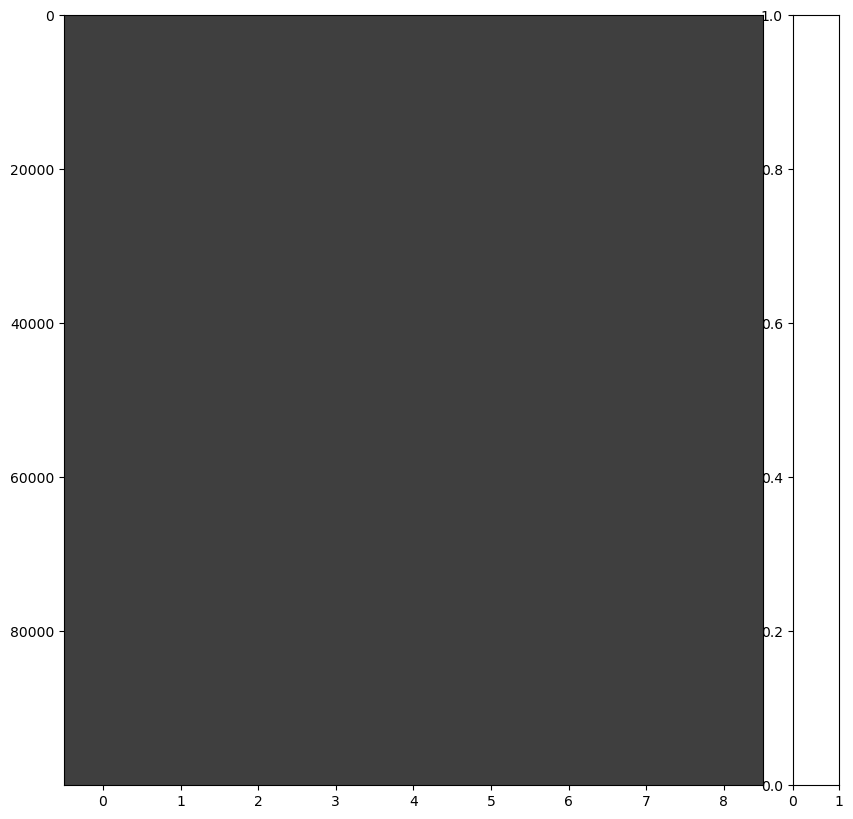

In [20]:
#données manquantes
msno.matrix(df, figsize=(10,10)) #RIEN

In [21]:
# Identifcation lignes identiques
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
print (df.duplicated().sum())

       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

# VISUALISATION

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

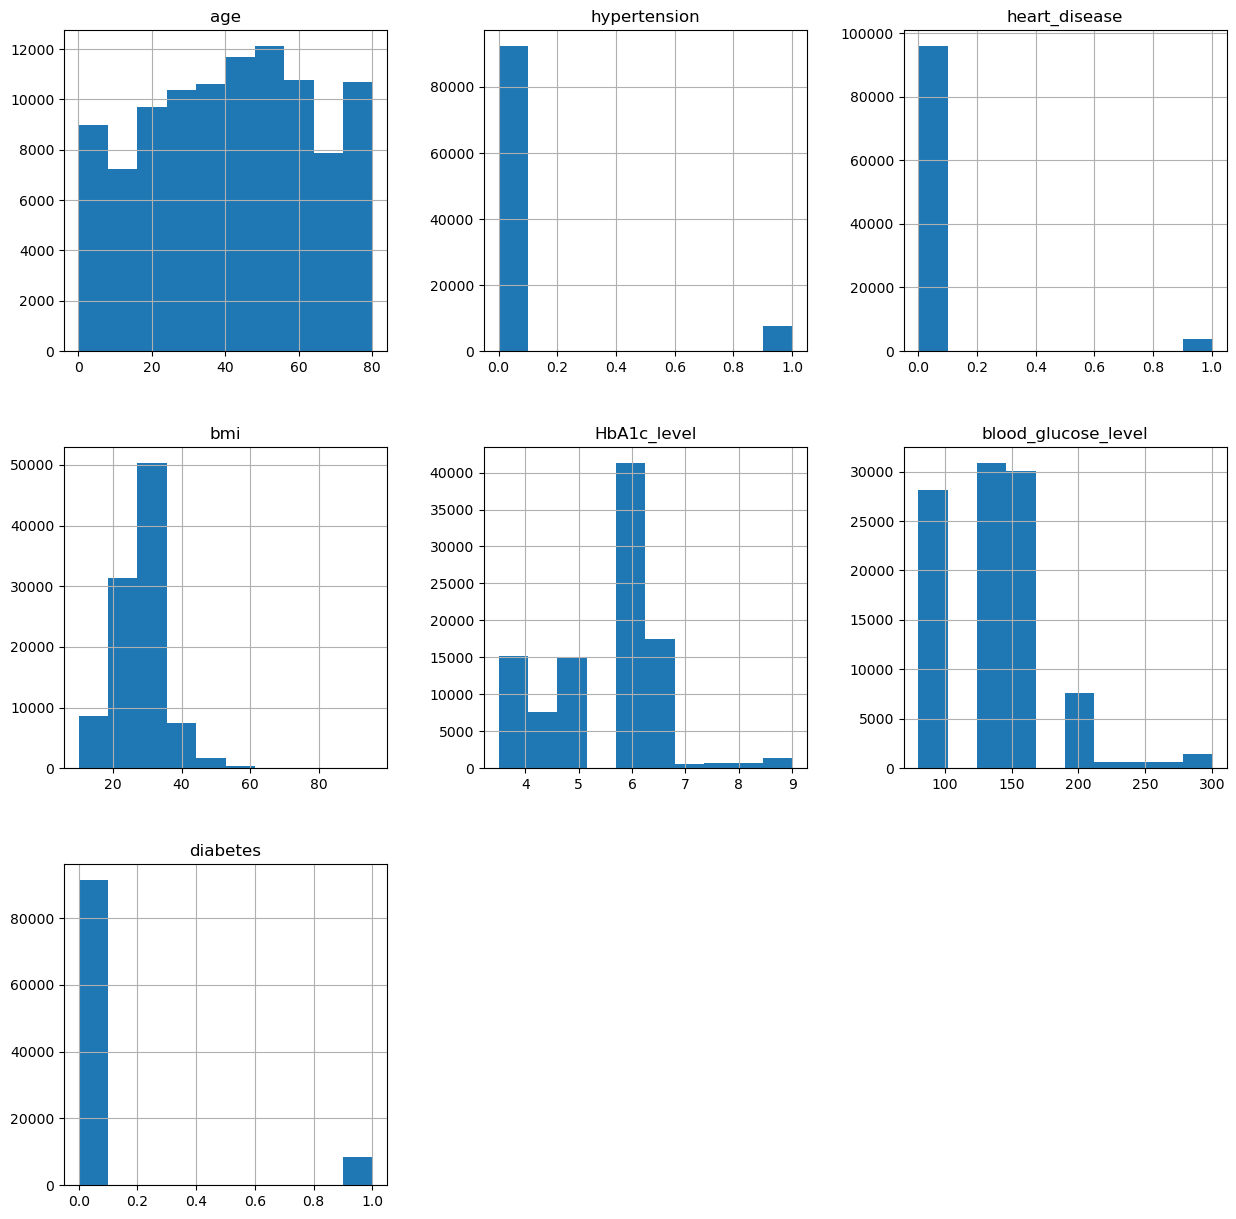

In [22]:
#Visualisation des variables en histogrammes
df_visualisation =df.hist(figsize=(15,15))
df_visualisation

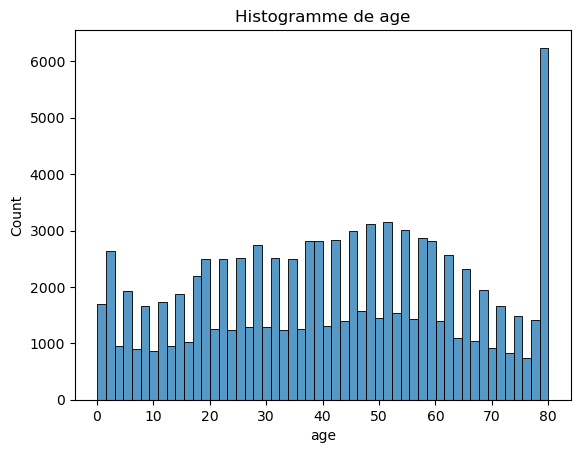

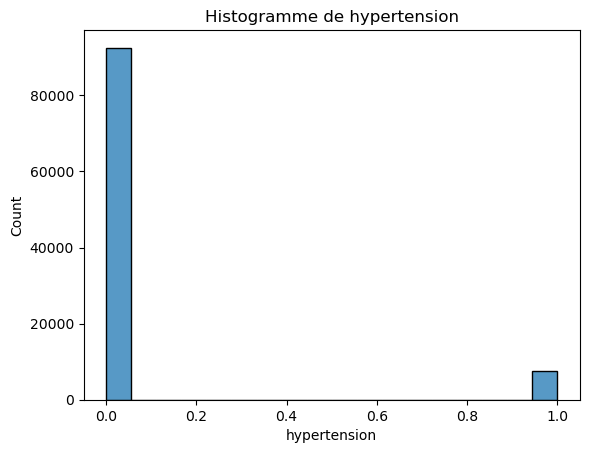

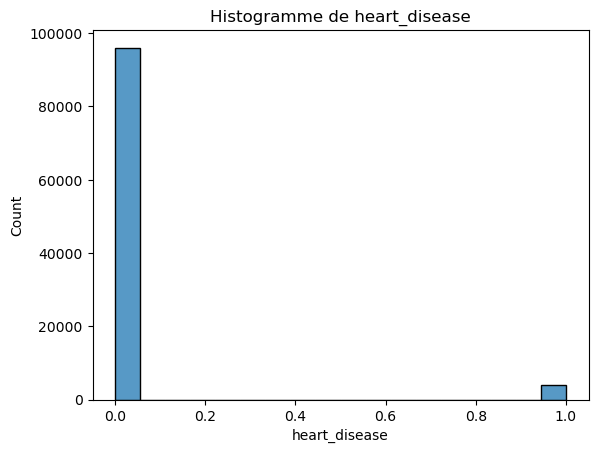

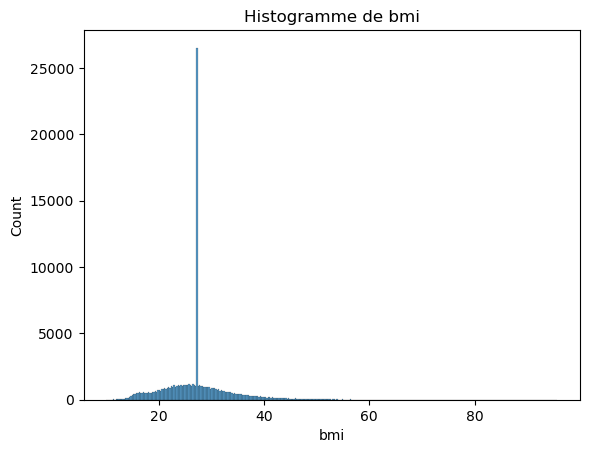

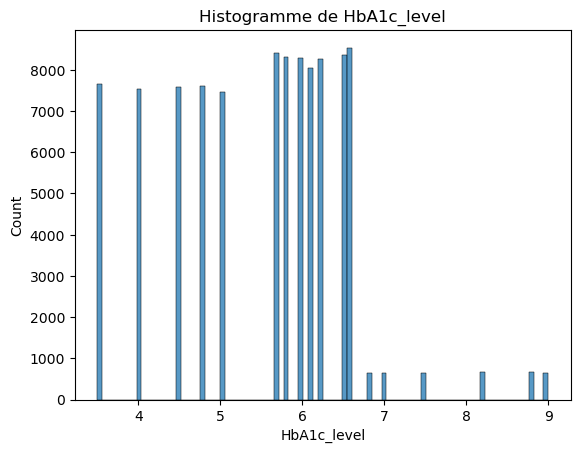

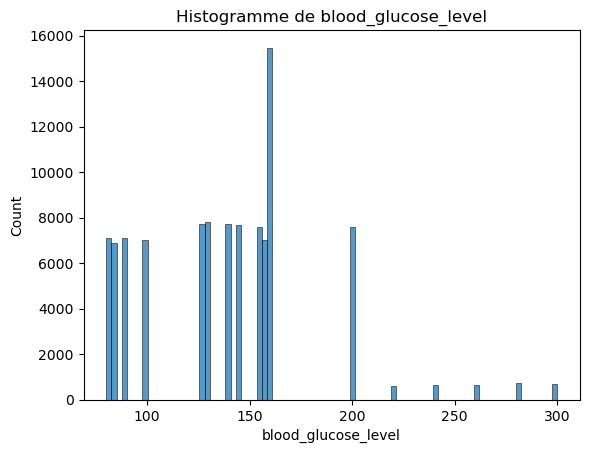

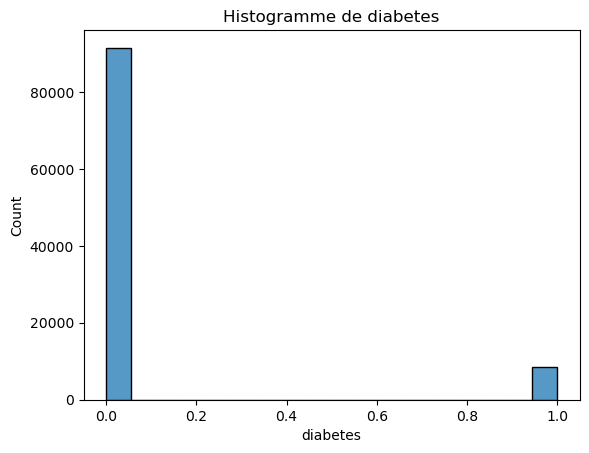

In [23]:
# histogrammes uniquement par rapport aux variables quantitatives
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()
        sns.histplot(df[column])
        plt.title(f'Histogramme de {column}')
        plt.xlabel(column)
       
    plt.show()

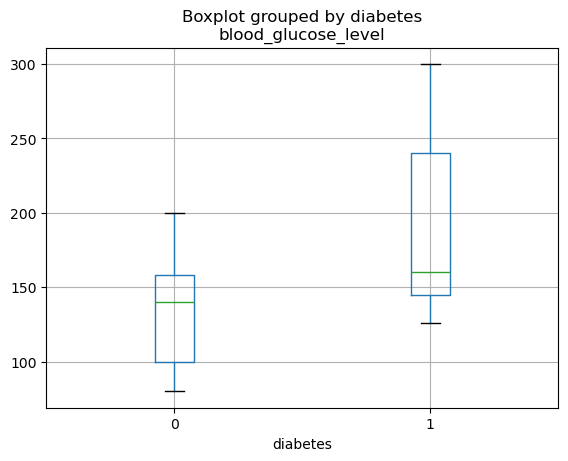

In [24]:
df.boxplot(column ='blood_glucose_level', by ='diabetes')
plt.show()

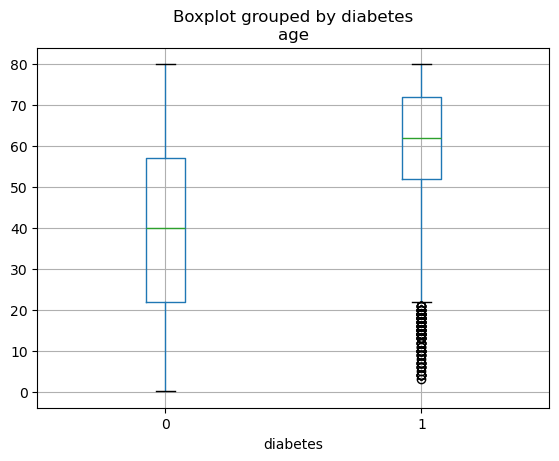

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
axes = df.boxplot(column ='age', by ='diabetes')
plt.show()

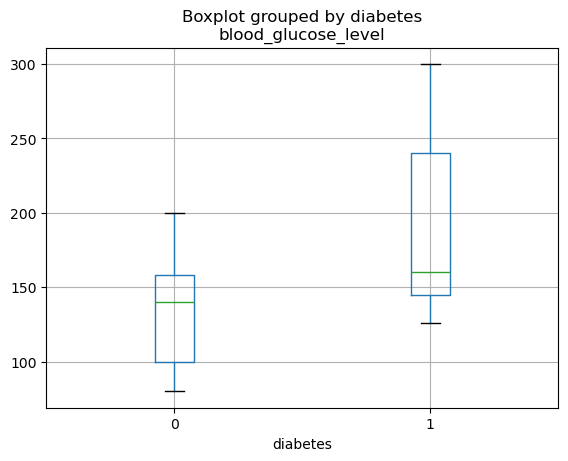

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
axes = df.boxplot(column ='blood_glucose_level', by ='diabetes')
plt.show()

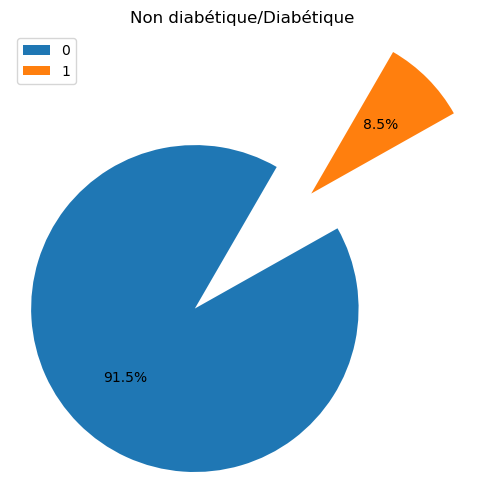

In [27]:
# camembert diabete
plt.figure(figsize=(6, 6))
plt.pie(df.diabetes.value_counts(), df.diabetes.value_counts().index, autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.legend(df.diabetes.value_counts().index, loc='best')
plt.title('Non diabétique/Diabétique')
plt.show()

<Axes: >

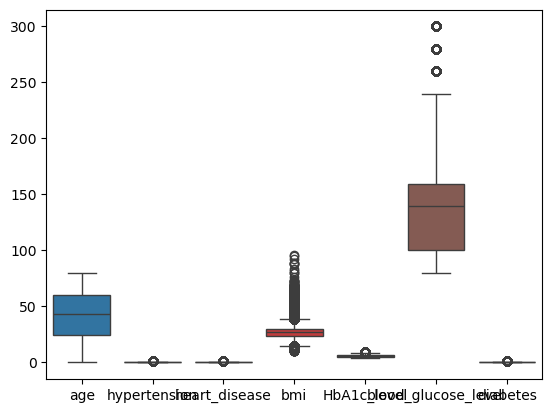

In [28]:
sns.boxplot(data=df.select_dtypes(include='number')) # sélection uniquement variables numériques via number

# CORRELATION ENTRE VARIABLES QUANTITATIVES

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>, <Axes: >]], dtype=object)

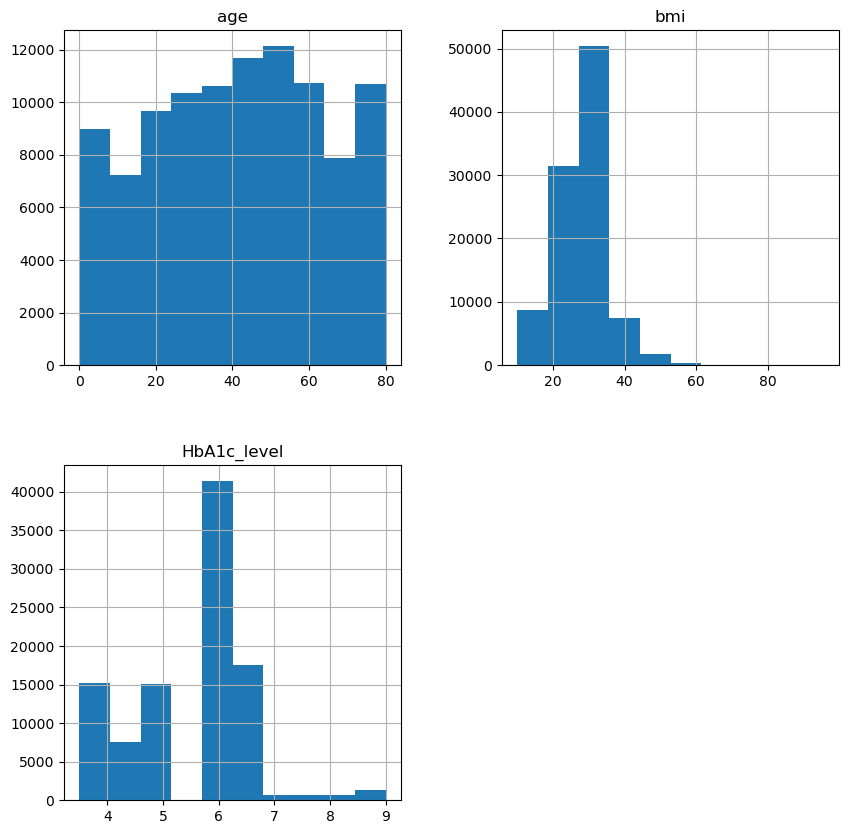

In [30]:
features = ['age', 'bmi','HbA1c_level']
df[features].hist(figsize=(10, 10))

<Axes: >

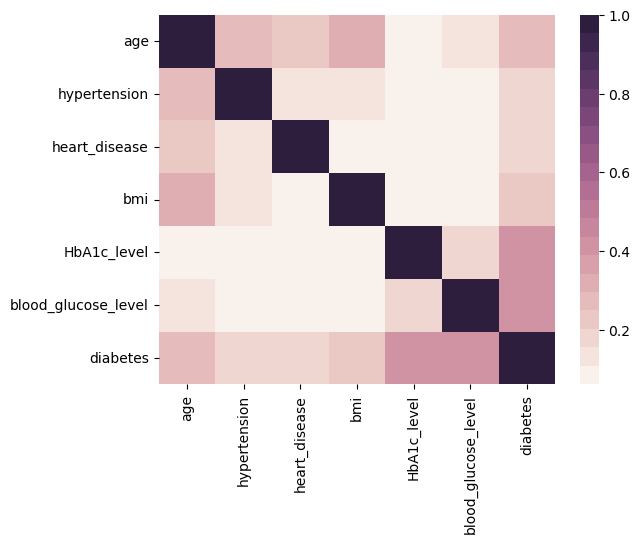

In [31]:
#carte de corrélation
sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

# TEST DU CHI-2 entre diabete et variables qualitatives

Table du chi2 :
diabetes          0     1
hypertension             
0             86103  6412
1              5397  2088



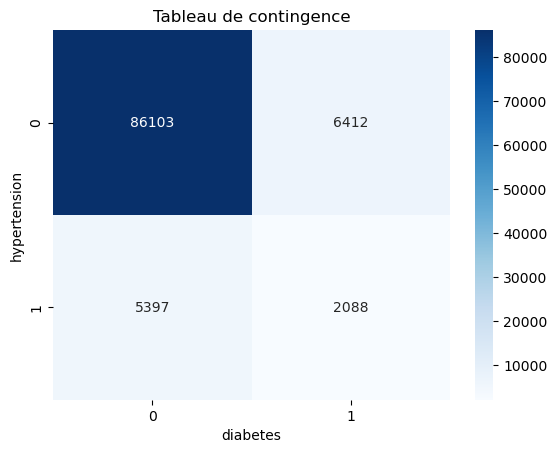

Test du chi2 d'indépendance :
Chi2 : 3910.708546826595
P-value : 0.0


In [32]:
#diabetes hypertension
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
contingency_table = pd.crosstab(df['hypertension'], df['diabetes'])

# Test du chi2 d'indépendance
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Table du chi2 :\n{contingency_table}\n")


# Visualisation du test du chi2
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Tableau de contingence")
plt.show()


# Affichage des résultats du test
print(f"Test du chi2 d'indépendance :")
print(f"Chi2 : {chi2}")
print(f"P-value : {p}")

Table du chi2 :
gender    Female   Male  Other
diabetes                      
0          54091  37391     18
1           4461   4039      0



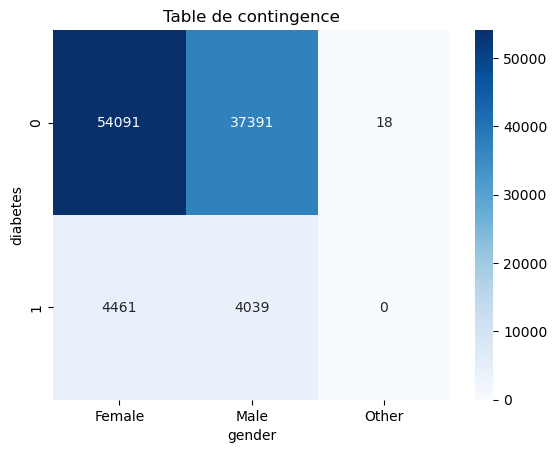

Test du chi2 d'indépendance :
Chi2 : 143.21825102550295
P-value : 7.953383718307576e-32


In [33]:
#diabetes et gender
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(df['diabetes'], df['gender'])

# Test du chi2 d'indépendance
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"Table du chi2 :\n{contingency_table}\n")


# Visualisation du test du chi2
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Table de contingence")
plt.show()


# Affichage des résultats du test
print(f"Test du chi2 d'indépendance :")
print(f"Chi2 : {chi2}")
print(f"P-value : {p}")

Table du chi2 :
smoking_history  No Info  current  ever  former  never  not current
diabetes                                                           
0                  34362     8338  3532    7762  31749         5757
1                   1454      948   472    1590   3346          690



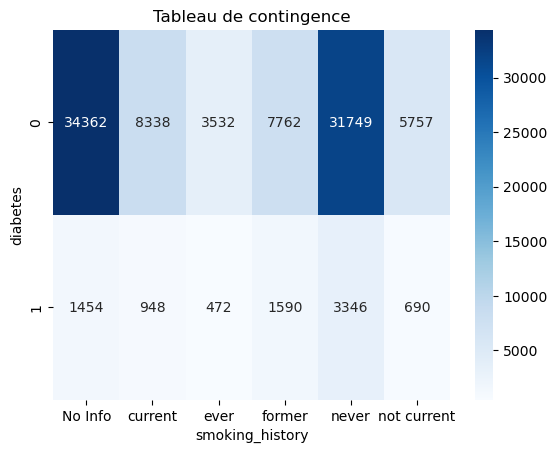

Test du chi2 d'indépendance :
Chi2 : 1956.0944200848764
P-value : 0.0


In [34]:
#diabetes et smoking history
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt



contingency_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Test du chi2 d'indépendance
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"Table du chi2 :\n{contingency_table}\n")


# Visualisation du test du chi2
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Tableau de contingence")
plt.show()


# Affichage des résultats du test
print(f"Test du chi2 d'indépendance :")
print(f"Chi2 : {chi2}")
print(f"P-value : {p}")

Table du chi2 :
heart_disease      0     1
diabetes                  
0              88825  2675
1               7233  1267



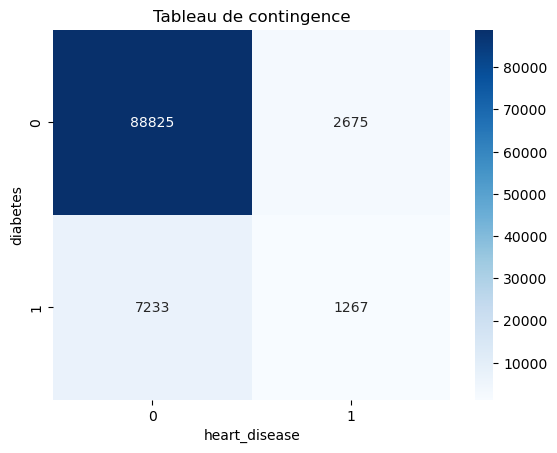

Test du chi2 d'indépendance :
Chi2 : 2945.85
P-value : 0.0


In [35]:
#diabetes et heart_disease
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(df['diabetes'], df['heart_disease'])

# Test du chi2 d'indépendance
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"Table du chi2 :\n{contingency_table}\n")


# Visualisation du test du chi2
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Tableau de contingence")
plt.show()


# Affichage des résultats du test
print(f"Test du chi2 d'indépendance :")
print(f"Chi2 : {chi2.round(2)}")
print(f"P-value : {p}")

In [36]:
# AFFICHAGE DES EFFECTIFS THEORIQUES POUR LE TEST DU KHI-2, cas lien diabetes - genre
observed_contingency_table = pd.crosstab(df['diabetes'], df['gender'])

# Test du chi2 d'indépendance avec récupération des effectifs théoriques
chi2, p, dof, expected_contingency_table = chi2_contingency(observed_contingency_table)

# Affichage des effectifs observés
print("Tableau de contingence observée :\n", observed_contingency_table)

# Affichage des effectifs théoriques
print("\nTableau de contingence attendue (effectifs théoriques) :\n", expected_contingency_table)

Tableau de contingence observée :
 gender    Female   Male  Other
diabetes                      
0          54091  37391     18
1           4461   4039      0

Tableau de contingence attendue (effectifs théoriques) :
 [[5.357508e+04 3.790845e+04 1.647000e+01]
 [4.976920e+03 3.521550e+03 1.530000e+00]]


# 

# CHOIX DU MEILLEUR ALGORITHME

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib widget

In [38]:
def disp_cm(y_pred, y_test, algo, a_n, s_n=None, r_n=None):
    fig = plt.figure()
    if (s_n != None) and (r_n != None):
        Title = 'Confusion matrix of {} with {} and {}'.format(a_n, s_n, r_n)
    elif (s_n == None) and (r_n != None):
        Title = 'Confusion matrix of the classifier {} with {}'.format(a_n, r_n)
    elif (s_n != None) and (r_n == None):
        Title = 'Confusion matrix of the classifier {} with {}'.format(a_n, s_n)
    elif (s_n == None) and (r_n == None):
        Title = 'Confusion matrix of the classifier {}'.format(a_n)
    else:
        Title = 'Confusion matrix of the classifier'

    plt.title(Title)
    cm = confusion_matrix(y_test, y_pred, labels=algo.classes_)
    sns.heatmap(cm,annot=True,fmt=".0f",
                xticklabels=['No diabetes', 'With diabetes'],
                yticklabels=['No diabetes', 'With diabetes'])
    plt.xlabel('Predicted')
    #plt.xticks(rotation=45)
    plt.ylabel('True')
    plt.ioff()
    plt.show()

In [39]:
def test_algo(algo, X, y, scaler=None, resampler=None, a_n=None, s_n=None, r_n=None):

    if scaler!=None:
        X = scaler.fit_transform(X)
    if resampler!=None:
        X, y = resampler.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

    algo.fit(X_train, y_train)

    y_pred = algo.predict(X_test)

    #disp_cm(y_pred, y_test, algo, a_n, s_n, r_n)

    score = algo.score(X_test, y_test)

    return [score, algo, X_train, X_test, y_train, y_test, y_pred, a_n, s_n, r_n]

In [40]:
df = pd.read_csv(r"C:\Users\yanni\Documents\Cours_ICAM\IA_proj\Dataset_diabete_kaggle\diabetes_prediction_dataset.csv", sep=",")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [41]:
df_num = df
df_num['smoking_history_num']=df_num['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})
df_num['gender_num']=df_num['gender'].map({'Female':0,'Male':1,'Other':2})
df_num=df_num.drop('smoking_history',axis=1)
df_num=df_num.drop('gender',axis=1)
df_num = df_num.loc[df_num["gender_num"]!=2]
df_num

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_num,gender_num
0,80.0,0,1,25.19,6.6,140,0,0,0
1,54.0,0,0,27.32,6.6,80,0,-1,0
2,28.0,0,0,27.32,5.7,158,0,0,1
3,36.0,0,0,23.45,5.0,155,0,2,0
4,76.0,1,1,20.14,4.8,155,0,2,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,-1,0
99996,2.0,0,0,17.37,6.5,100,0,-1,0
99997,66.0,0,0,27.83,5.7,155,0,1,1
99998,24.0,0,0,35.42,4.0,100,0,0,0


In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans, MiniBatchKMeans 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, SVMSMOTE

In [43]:
ada = ADASYN(random_state=42)
smenc = SMOTENC(random_state=42, categorical_features=[1, 2, 6, 7])
sm = SMOTE(random_state=42)
smSVM = SVMSMOTE(random_state=42)


res_list = [None ,sm, smenc, ada, smSVM]
res_list_name = ['None' ,'sm', 'smenc', 'ada', 'smSVM']

In [44]:
stdScaler = StandardScaler()
minmaxScaler = MinMaxScaler()

scaler_list = [None, stdScaler, minmaxScaler]
scaler_list_name = ['None', 'stdScaler', 'minmaxScaler']

In [45]:
log_reg = LogisticRegression()
rdmFor = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")

algo_list = [log_reg, rdmFor, knn]
algo_list_name = ['log_reg', 'rdmFor', 'knn']

In [46]:
X = df_num.drop('diabetes',axis=1)
y = df_num['diabetes']

In [47]:
%%time
score = {}
for a in range(len(algo_list)):
  for s in range(len(scaler_list)):
    for r in range(len(res_list)):
      X = df_num.drop('diabetes',axis=1)
      y = df_num['diabetes']
      key = algo_list_name[a]+' '+scaler_list_name[s]+' '+res_list_name[r]
      score[key]=test_algo(algo_list[a], X, y, scaler=scaler_list[s], resampler=res_list[r], a_n=algo_list_name[a], s_n=scaler_list_name[s], r_n=res_list_name[r])


C:\Users\yanni\anaconda3\envs\ai\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yanni\anaconda3\envs\ai\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

CPU times: total: 5min 10s
Wall time: 12min 21s


# RESULTATS

In [48]:
s_max=0
for k,v in score.items():
    print(k,v[0])
    if v[0]>s_max:
        s_max = v[0]

log_reg None None 0.9572
log_reg None sm 0.8856466302367941
log_reg None smenc 0.8901639344262295
log_reg None ada 0.8515829694323144
log_reg None smSVM 0.8958834244080146
log_reg stdScaler None 0.9589
log_reg stdScaler sm 0.8851183970856102
log_reg stdScaler smenc 0.8841530054644808
log_reg stdScaler ada 0.837662691281381
log_reg stdScaler smSVM 0.8913296903460838
log_reg minmaxScaler None 0.9588
log_reg minmaxScaler sm 0.884735883424408
log_reg minmaxScaler smenc 0.8830054644808744
log_reg minmaxScaler ada 0.8381479654296625
log_reg minmaxScaler smSVM 0.8940255009107468
rdmFor None None 0.9706333333333333
rdmFor None sm 0.9732969034608379
rdmFor None smenc 0.9739708561020036
rdmFor None ada 0.9717976710334789
rdmFor None smSVM 0.9759562841530055
rdmFor stdScaler None 0.9701
rdmFor stdScaler sm 0.9767030965391621
rdmFor stdScaler smenc 0.9767577413479053
rdmFor stdScaler ada 0.9751311514095373
rdmFor stdScaler smSVM 0.9772131147540983
rdmFor minmaxScaler None 0.9704
rdmFor minmaxScale

In [49]:
s_max

0.9772131147540983

In [50]:
for k,v in score.items():
    if v[0]==s_max:
        best = v
        print(k,v)

rdmFor stdScaler smSVM [0.9772131147540983, RandomForestClassifier(), array([[ 0.86842547, -0.28443945,  4.93637859, ...,  1.96706439,
         1.94244283,  1.18723364],
       [ 0.76940793, -0.28443945, -0.20257766, ...,  1.58627375,
         1.22971132,  1.18723364],
       [-1.06080496, -0.28443945, -0.20257766, ..., -0.19794815,
         1.22971132,  1.18723364],
       ...,
       [ 0.26948138, -0.28443945, -0.20257766, ...,  0.52030065,
        -0.90848322,  1.18723364],
       [ 0.71373999, -0.28443945, -0.20257766, ..., -0.26398274,
         1.22971132,  1.18723364],
       [ 0.63148799, -0.28443945, -0.20257766, ...,  0.51444371,
         0.5169798 ,  1.18723364]]), array([[ 0.13675533, -0.28443945, -0.20257766, ...,  2.021487  ,
        -0.19575171, -0.84104674],
       [-0.66110211, -0.28443945, -0.20257766, ...,  0.53900895,
        -0.19575171, -0.84104674],
       [-1.01639353, -0.28443945, -0.20257766, ..., -1.42620999,
        -0.19575171, -0.84104674],
       ...,
    

## ALGORITHME AVEC LE MEILLEUR SCORE

In [51]:
[b_score, b_algo, X_train, X_test, y_train, y_test, y_pred, b_a_n, b_s_n, b_r_n] = best

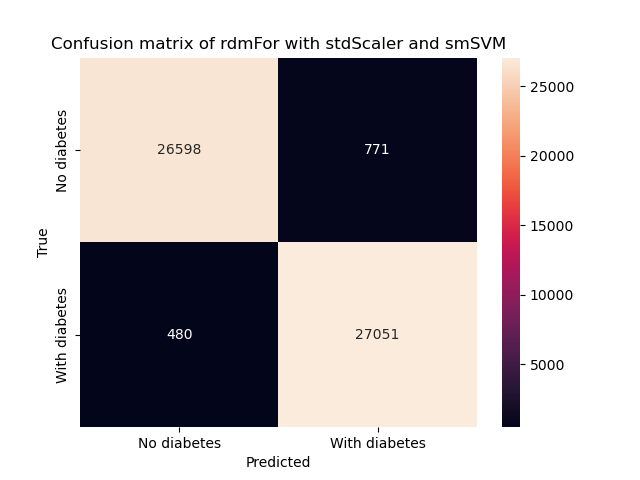

In [52]:
disp_cm(y_pred, y_test, b_algo, b_a_n, b_s_n, b_r_n)

## TRI DES ALGORITMES PAR SCORE

In [53]:
sorted_values_score = sorted(score.values(), reverse=True)

In [54]:
df_score_export = []
for el in sorted_values_score:
    #print('Score :',f'{el[0]:.4f}', '  Algo :', el[1],'  Scaler :', el[-2],'  Re-sampler :', el[-1])
    df_score_export.append([el[0], el[-3], el[-2], el[-1]])

In [55]:
df_score_export = pd.DataFrame(df_score_export, columns=['Score', 'Algo', 'Scaler','Re-sampler'])
df_score_export.to_csv('Algo_comparison_diabetes.csv')
df_score_export

,Score,Algo,Scaler,Re-sampler
0,0.977213,rdmFor,stdScaler,smSVM
1,0.976758,rdmFor,stdScaler,smenc
2,0.976703,rdmFor,stdScaler,sm
3,0.976430,rdmFor,minmaxScaler,smSVM
4,0.975956,rdmFor,None,smSVM
5,0.975683,rdmFor,minmaxScaler,sm
6,0.975155,rdmFor,minmaxScaler,smenc
7,0.975131,rdmFor,stdScaler,ada
8,0.973971,rdmFor,None,smenc
9,0.973297,rdmFor,None,sm


## ALGORITME MINIMISANT LES FAUX NEGATIFS (MALADES NON DETECTES)

In [56]:
cm = []
for a in range(len(algo_list)):
  for s in range(len(scaler_list)):
    for r in range(len(res_list)):
        key = algo_list_name[a]+' '+scaler_list_name[s]+' '+res_list_name[r]
        score_tmp, algo_tmp, X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp, y_pred_tmp, a_n_tmp, s_n_tmp, r_n_tmp = score[key]
        cm_tmp = confusion_matrix(y_test_tmp, y_pred_tmp)
        ratio = cm_tmp[1][0]/cm_tmp.sum() * 100
        cm.append((ratio, cm_tmp, key))

In [68]:
cm_sorted = sorted(cm, key=lambda x: x[0])

In [69]:
cm_sorted[0:5]

[(0.3993537729855325,
  array([[24489,  2923],
         [  220, 27457]], dtype=int64),
  'knn stdScaler ada'),
 (0.5116117597617351,
  array([[24292,  3060],
         [  280, 27097]], dtype=int64),
  'knn minmaxScaler ada'),
 (0.5385735080058224,
  array([[23605,  3836],
         [  296, 27223]], dtype=int64),
  'knn None ada'),
 (0.6138433515482696,
  array([[25354,  2015],
         [  337, 27194]], dtype=int64),
  'knn minmaxScaler smSVM'),
 (0.6797127665405909,
  array([[26245,  1107],
         [  372, 27005]], dtype=int64),
  'rdmFor minmaxScaler ada')]

In [70]:
best_min_FN_algo = score[cm_sorted[0][2]]
best_min_FN_algo

[0.9429468677957487,
 KNeighborsClassifier(),
 array([[-0.61365482, -0.28443945, -0.20257766, ...,  1.52161842,
         -0.19575171, -0.84104674],
        [-0.7943364 , -0.28443945, -0.20257766, ...,  0.53900895,
         -0.19575171,  1.18723364],
        [ 0.53800643, -0.28443945, -0.20257766, ...,  0.41618277,
         -0.90848322, -0.84104674],
        ...,
        [ 0.61350829,  3.51568677, -0.20257766, ..., -0.20777245,
         -0.19575171, -0.84104674],
        [ 1.14046331, -0.28443945, -0.20257766, ...,  0.53900895,
         -0.19575171, -0.84104674],
        [ 0.83809835,  3.51568677, -0.20257766, ..., -0.20621395,
         -0.19575171, -0.84104674]]),
 array([[ 0.96407912, -0.28443945, -0.20257766, ...,  0.44573766,
          0.5169798 ,  1.18723364],
        [-0.14276792, -0.28443945, -0.20257766, ...,  0.51444371,
         -0.90848322, -0.84104674],
        [ 1.12061364, -0.28443945, -0.20257766, ..., -0.19794815,
         -0.19575171,  1.18723364],
        ...,
        

In [ ]:
best_algo = test_algo(knn, X, y, scaler=stdScaler, resampler=ada, a_n='knn', s_n='stdscale', r_n='ada')

In [71]:
score_tmp, algo_tmp, X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp, y_pred_tmp, a_n_tmp, s_n_tmp, r_n_tmp = best_min_FN_algo
cm_tmp = confusion_matrix(y_test_tmp, y_pred_tmp)
ratio = cm_tmp[1][0]/cm_tmp.sum() * 100

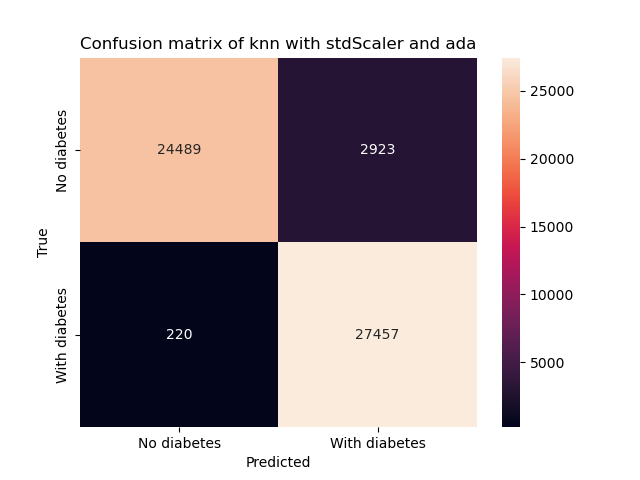

In [72]:
disp_cm(y_pred_tmp, y_test_tmp, algo_tmp, a_n_tmp, s_n_tmp, r_n_tmp)

## ESSAI AVEC DES DONNEES DE TEST SANS RESAMPLING

In [87]:
df = pd.read_csv(r"C:\Users\yanni\Documents\Cours_ICAM\IA_proj\Dataset_diabete_kaggle\diabetes_prediction_dataset.csv", sep=",")
df_num = df
df_num['smoking_history_num']=df_num['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})
df_num['gender_num']=df_num['gender'].map({'Female':0,'Male':1,'Other':2})
df_num=df_num.drop('smoking_history',axis=1)
df_num=df_num.drop('gender',axis=1)
df_num = df_num.loc[df_num["gender_num"]!=2]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_num,gender_num
0,80.0,0,1,25.19,6.6,140,0,0,0
1,54.0,0,0,27.32,6.6,80,0,-1,0
2,28.0,0,0,27.32,5.7,158,0,0,1
3,36.0,0,0,23.45,5.0,155,0,2,0
4,76.0,1,1,20.14,4.8,155,0,2,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,-1,0
99996,2.0,0,0,17.37,6.5,100,0,-1,0
99997,66.0,0,0,27.83,5.7,155,0,1,1
99998,24.0,0,0,35.42,4.0,100,0,0,0


In [88]:
X = df_num.drop('diabetes',axis=1)
y = df_num['diabetes']

In [89]:
best_algo = test_algo(knn, X, y, scaler=stdScaler, resampler=ada, a_n='knn', s_n='stdscale', r_n='ada')

In [93]:
X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(X, y, test_size=0.3, random_state = 42)
best_algo_prod = algo_tmp
X_test_prod = stdScaler.fit_transform(X_test_prod)
y_pred_prod = best_algo_prod.predict(np.array(X_test_prod))
score_prod = best_algo_prod.score(np.array(X_test_prod),np.array(y_test_prod))

In [94]:
cm_tmp_prod = confusion_matrix(y_test_prod, y_pred_prod)
ratio_prod = cm_tmp_prod[1][0]/cm_tmp_prod.sum() * 100
ratio_prod

0.0033338889814969164

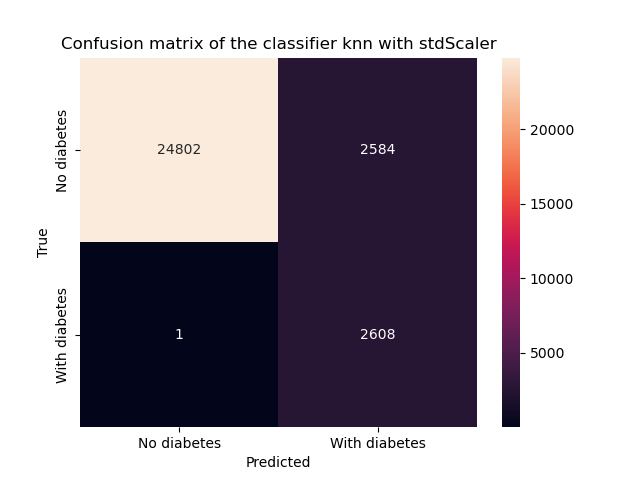

In [95]:
disp_cm(y_pred_prod, y_test_prod, algo_tmp, a_n_tmp, s_n_tmp)